<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/capstone_Graduate_Admission_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

This dataset is created for the prediction of Graduate admissions from an Indian perspective. The dataset contains various features that are important during the application for the Master's Program. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a student for admission.

## About the dataset (Graduate admissions prediction data) 

**Serial No.:** Serial number of student 

**GRE Scores:** GRE score (out of 340)

**TOEFL Scores:** TOEFL score (out of 120)

**University Rating:** University rating (out of 5)

**SOP:** Strength of Statement of Purpose (out of 5)

**LOR:** Strength of Letter of Recommendation (out of 5)

**CGPA:** Undergraduate CGPA (out of 10)

**Research:** Research experience (either 0 or 1)

**Chance of Admit:** Chance of admission (target/dependent variable)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Train-Test Split](#split)**
3. **[Boosting Methods](#boosting)**
    - 3.1 - **[AdaBoost](#ada)**
    - 3.2 - **[Gradient Boosting](#gradient)**
    - 3.3 - **[XGBoost](#xgboost)**
        - 3.3.1 - **[Tune the Hyperparameters (GridSearchCV)](#tune)**
4. **[Stack Generalization](#stack)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [98]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [99]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [100]:
# load the csv file
# store the data in 'df_admissions'
df_admissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_galytix/Admission_Predict.csv')

# display first five observations using head()
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,1
1,2,324,107,4,4.000000,4.500000,8.870000,1,1
2,3,316,104,3,3.000000,3.500000,8.000000,1,0
3,4,322,110,3,3.500000,2.500000,8.670000,1,1
4,5,314,103,2,2.000000,3.000000,8.210000,0,0


**Let us now see the number of variables and observations in the data.**

In [101]:
# use 'shape' to check the dimension of data
df_admissions.shape

(400, 9)

In [102]:
# df_admissions.columns=['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
#        'LOR', 'CGPA', 'Research', 'Chance of Admit']

**Interpretation:** The data has 400 observations and 9 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [103]:
# use 'dtypes' to check the data type of a variable
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

**Interpretation:** The variables `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR` and `CGPA` are numerical.

From the above output, we see that the data type of `Research` is 'int64'.

But according to the data definition, `Research` is a categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [104]:
# convert numerical variable to categorical (object) 
# use astype() to change the data type

# change the data type of 'Research'
df_admissions['Research'] = df_admissions['Research'].astype(object)

#### Recheck the data type after the conversion. 

In [105]:
# recheck the data types using 'dtypes'
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `Serial No.` contains the serial number of the student, which is redundant for further analysis. Thus, we drop the column.

In [106]:
# drop the column 'Serial No.' using drop()
# 'axis = 1' drops the specified column
df_admissions = df_admissions.drop('Serial No.', axis = 1)

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

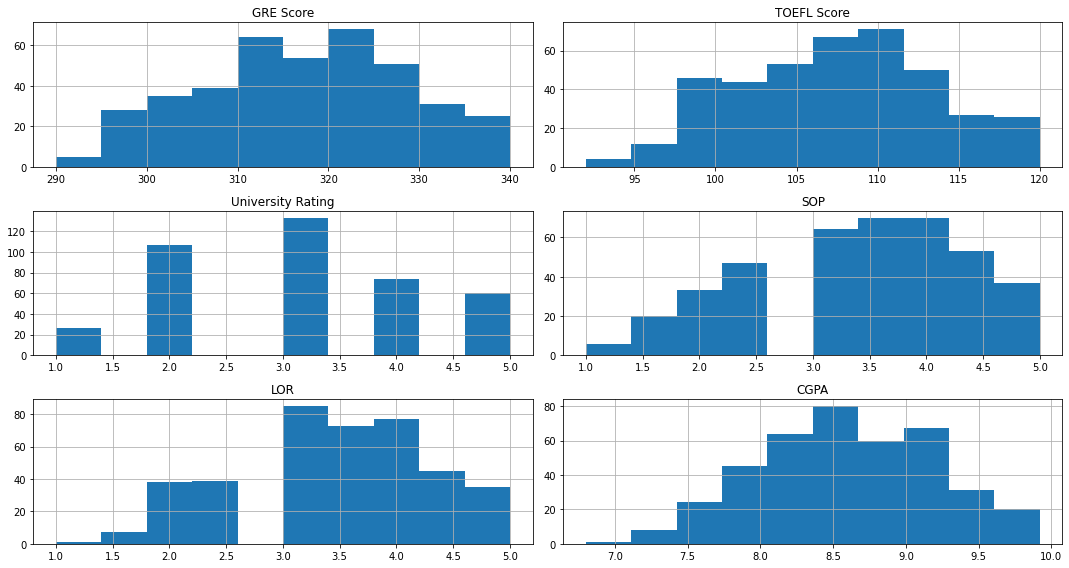


Distribution of the variables
Some observations from the histograms of all the variables:

1. The GRE scores are concentrate around the 320 mark and the lowest is around 290.
2. Most of the students have TOEFL scores in the 100-110 range.
3. Most of the students have average to good SOPs and LORs.
4. CGPA is concentrated on the higher side with the mean around 8.5.
 

Skewness:


GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

In [107]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_admissions.drop('Chance of Admit', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  
print ("""
Distribution of the variables
Some observations from the histograms of all the variables:

1. The GRE scores are concentrate around the 320 mark and the lowest is around 290.
2. Most of the students have TOEFL scores in the 100-110 range.
3. Most of the students have average to good SOPs and LORs.
4. CGPA is concentrated on the higher side with the mean around 8.5.
 \n""")

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_admissions.drop('Chance of Admit', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are near normally distributed.

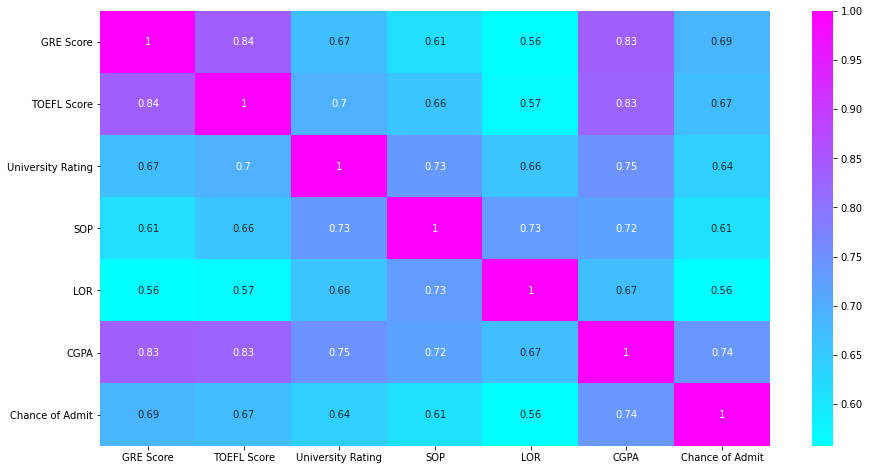

In [108]:
sns.heatmap(df_admissions.corr(),annot=True,cmap='cool')


Checking for correlation between variables
Some quick observations from the correlation plot:

*  There is no negative correlation between any of the variables
*  GRE scores and TOEFL scores are highly correlated
*  GRE score has just a weak correlation with LOR 
*   I was expecting a high correlation between LOR and CGPA - but not really the case
*  More than GRE/ TOEFL, chances of admit is highly correlated with CGPA. Least correlated with Research experience

**Distribution of categoric independent variable.**

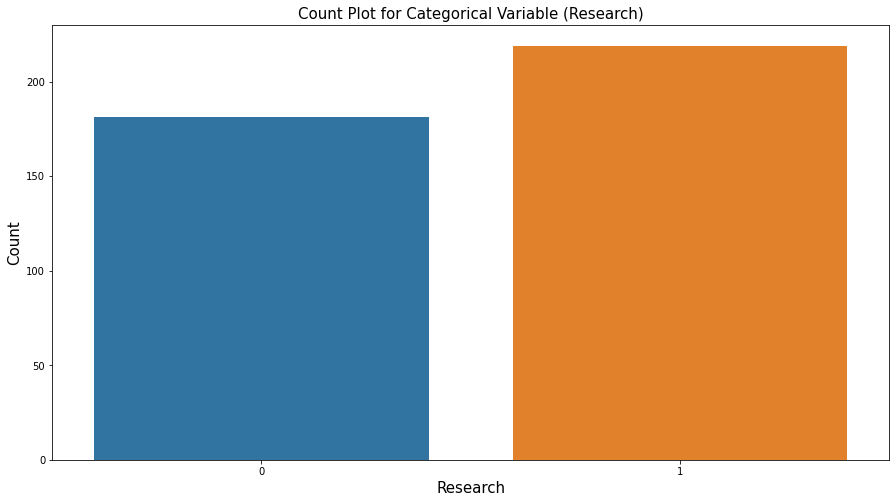

In [109]:
# for the independent categoric variable, we plot the count plot to check the distribution of the variable 'Research'
# use countplot() to plot the count of each label in the categorical variable 
sns.countplot(df_admissions.Research)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

#### Distribution of dependent variable.

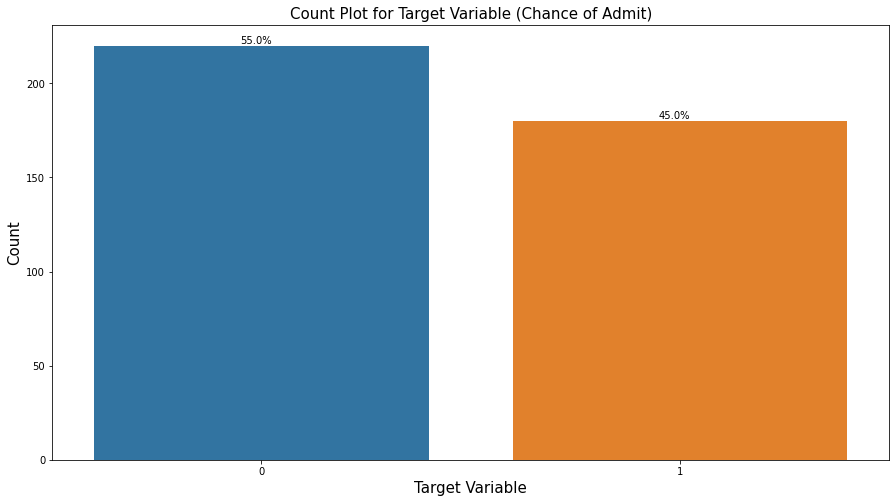

In [110]:
# consider only the target variable
df_target = df_admissions['Chance of Admit'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation:** The above plot shows that there is no imbalance in the target variable.

<a id="null"></a>
## 2.5 Missing Value Treatment

First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [111]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_admissions.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_admissions.isnull().sum()*100/df_admissions.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Chance of Admit,0,0.000000
Research,0,0.000000
CGPA,0,0.000000
LOR,0,0.000000
SOP,0,0.000000
University Rating,0,0.000000
TOEFL Score,0,0.000000
GRE Score,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [112]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df_admissions['Chance of Admit']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df_admissions.drop('Chance of Admit', axis = 1)

#### Filter numerical and categorical variables.

In [113]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [114]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['Research'], dtype='object')

The regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [115]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [116]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,337,118,4,4.500000,4.500000,9.650000,1
1,324,107,4,4.000000,4.500000,8.870000,1
2,316,104,3,3.000000,3.500000,8.000000,1
3,322,110,3,3.500000,2.500000,8.670000,1
4,314,103,2,2.000000,3.000000,8.210000,0


<a id="split"></a>
## 2.7 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [117]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 7)
y_train (320,)
X_test (80, 7)
y_test (80,)


#### Create a generalized function to calculate the metrics for the test set.

In [118]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Plot the confusion matrix.

In [119]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of the separability of the model.

In [120]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

<a id="boosting"></a>
# 3. Boosting Methods

The Ensemble technique considers multiple models for predicting the results. `Bagging` and `Boosting` are two of the types of ensembles. The bagging methods construct the multiple models in parallel; whereas, the boosting methods construct the models sequentially.

Earlier, we have studied one of the bagging (bootstrap aggregating) technique i.e. `Random Forest`.

The boosting method fits multiple weak classifiers to create a strong classifier. In this method, the model tries to correct the errors in the previous model. In this section, we learn some of the boosting methods such as `AdaBoost`, `Gradient Boosting` and `XGBoost`.

<a id="ada"></a>
## 3.1 AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

#### Build an Adaboost model on a training dataset.

In [121]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=40, random_state=10)

Let us understand the parameters in the `AdaBoostClassifier()`:

`algorithm=SAMME.R`: It is the default boosting algorithm. This algorithm uses predicted class probabilities to build the stumps.

`base_estimator=None`: By default, the estimator is a decision tree with a maximum depth equal to 1 (stump).

`learning_rate=1.0`: It considers the contribution of each estimator in the classifier.

`n_estimators=40`: It is the number of estimators at which boosting is terminated.

`random_state=10`: It returns the same set of samples for each code implementation.

#### Plot the confusion matrix.

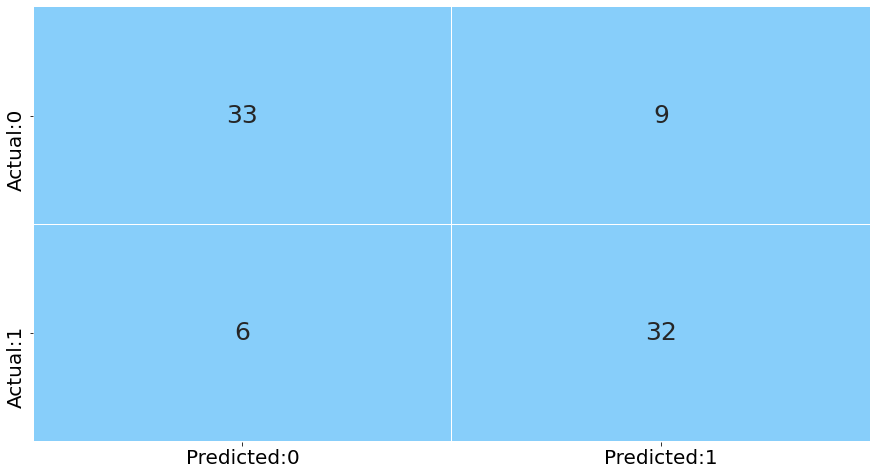

In [122]:
# call the function to plot the confusion matrix
# pass the AdaBoost model to the function
plot_confusion_matrix(ada_model)

**Calculate performance measures on the test set.**

In [123]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the AdaBoost model to the function
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.78      0.84      0.81        38

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



**Interpretation:** The output shows that the model is 81% accurate.

#### Plot the ROC curve.

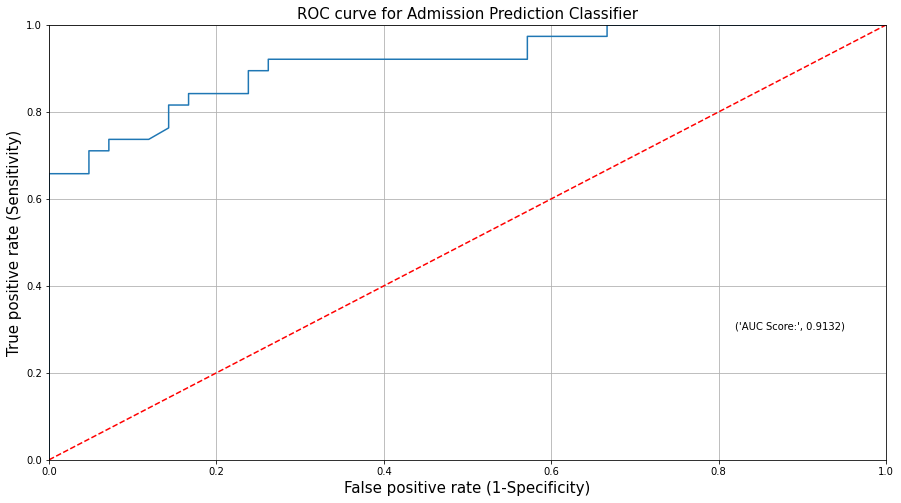

In [124]:
# call the function to plot the ROC curve
# pass the AdaBoost model to the function
plot_roc(ada_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the AdaBoost model is away from the dotted line; with the AUC score 0.9132.

<a id="gradient"></a>
## 3.2 Gradient Boosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

#### Build a gradient boosting model on a training dataset.

In [125]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Let us understand the parameters in the `GradientBoostingClassifier()`:

`ccp_alpha=0.0`: The complexity parameter used for pruning. By default, there is no pruning.

`criterion=friedman_mse`: The criteria to measure the quality of a split.

`init=None`: The estimator for initial predictions.

`learning_rate=0.1`: It considers the contribution of each estimator in the classifier.

`loss=deviance`: The loss function to be optimized.

`max_depth=10`: Assigns the maximum depth of the tree.

`max_features=None`: Maximum features to consider for the split.

`max_leaf_nodes=None`: Maximum number of leaf/terminal nodes in the tree.

`min_impurity_decrease=0.0`: A node splits if it decreases the impurity by the value given by this parameter. 

`min_impurity_split=None`: Minimum value of impurity for a node to split.

`min_samples_leaf=1`: Minimum number of samples needed at the leaf/terminal node.

`min_samples_split=2`: Minimum number of samples needed at the internal node to split. 

`min_weight_fraction_leaf=0.0`: Minimum weighted fraction needed at a leaf node.

`n_estimators=150`: The number of estimators to consider.

`n_iter_no_change=None`: Number of iterations after which the training should terminate if the score is not improving.

`presort='deprecated'`: It considers whether to presort the data. (This parameter may not be available in the latest versions). 

`random_state=10`: It returns the same set of samples for each code implementation.

`subsample=1.0`: Fraction of samples to use for fitting each estimator.

`tol=0.0001`: Value of tolerance to terminate the training.

`validation_fraction=0.1`: Fraction of training dataset used for validation.

`verbose=0`: Enables verbose output (by default, no progress will be printed).

`warm_start=False`: Whether to reuse the solution of previous code implementation (by default, it does not consider the previous solution).

#### Plot the confusion matrix.

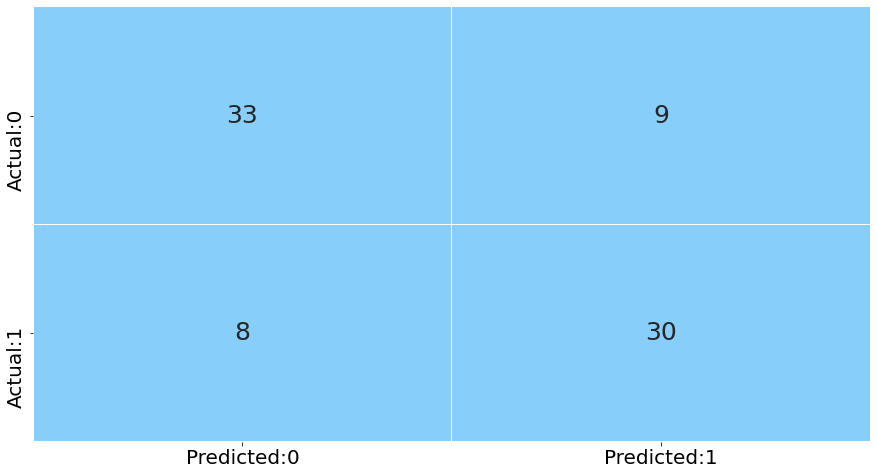

In [126]:
# call the function to plot the confusion matrix
# pass the gradient boosting model to the function
plot_confusion_matrix(gboost_model)

**Calculate performance measures on the test set.**

In [127]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.77      0.79      0.78        38

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



**Interpretation:** The classification report shows that the model is 79% accurate. Also, the sensitivity and specificity are equal.

#### Plot the ROC curve.

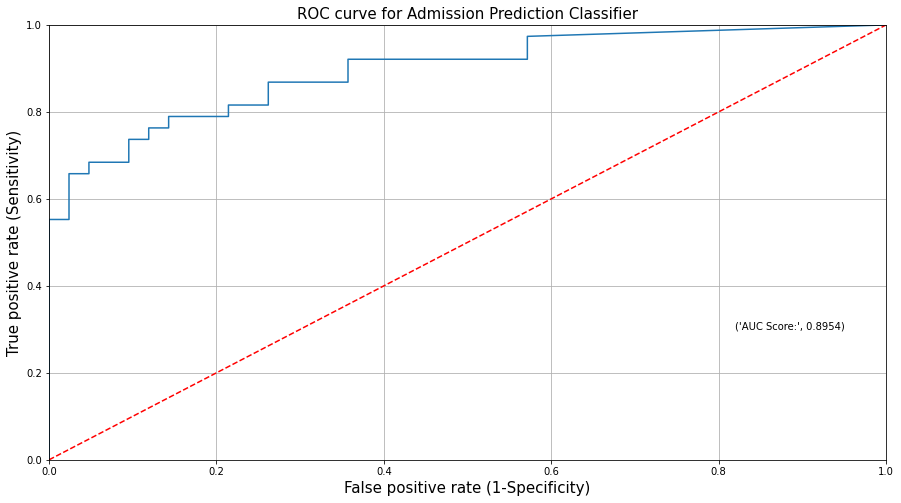

In [128]:
# call the function to plot the ROC curve
# pass the gradient boosting model to the function
plot_roc(gboost_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the gradient boosting model is away from the dotted line; with the AUC score 0.8954.

<a id="xgboost"></a>
## 3.3 XGBoost 

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

#### Build an XGBoost model on a training dataset.

In [129]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Let us understand the parameters in the `XGBClassifier()`:

`base_score=0.5`: Initial prediction for base learners.

`booster=gbtree`: Considers the regression tree as the base learners.

`colsample_bylevel=1`: Fraction of variables to consider for each level.

`colsample_bynode=1`: Fraction of variables to consider for each split.

`colsample_bytree=1`: Fraction of variables to consider for each tree.

`gamma=1`: Value of minimum loss reduction required for the partition of the leaf node.

`gpu_id=-1`: It considers all the GPU's. 

`importance_type=gain`: Importance type for calculating feature importance.

`interaction_constraints=''`: By default, no interaction between the features is allowed.

`learning_rate=0.300000012`: It considers the contribution of each estimator in the classifier.

`max_delta_step=0`: Maximum delta step allowed for each tree's weight estimation to be.

`max_depth=10`: Maximum depth of each tree.

`min_child_weight=1`: Minimum sum of hessian (p*(1-p)) required in a leaf node.

`missing=nan`: Value to consider as a missing value.

`monotone_constraints='()'`:  Constraint of variable monotonicity. (adding increasing/decreasing constraint on the variables )

`n_estimators=100`: The number of estimators to consider.

`n_jobs=0`: Number of parallel threads to run the classifier.

`num_parallel_tree=1`: It is used for boosting random forest.

`objective='binary:logistic'`: Considers the binary logistic regression as a learning objective.

`random_state=0`: It returns the same set of samples for each code implementation.

`reg_alpha=0`: Lasso regularization term for weights.

`reg_lambda=1`: Ridge regularization term for weights.

`scale_pos_weight=1`:  Ratio of the number of negative class to the positive class.

`subsample=1`: Fraction of total training data points.

`tree_method='exact'`: Considers the exact greedy algorithm.

`validate_parameters=1`: Performs validation on input paramerters.

`verbosity=None`: Enables verbose output (by default, no progress will be printed).

#### Plot the confusion matrix.

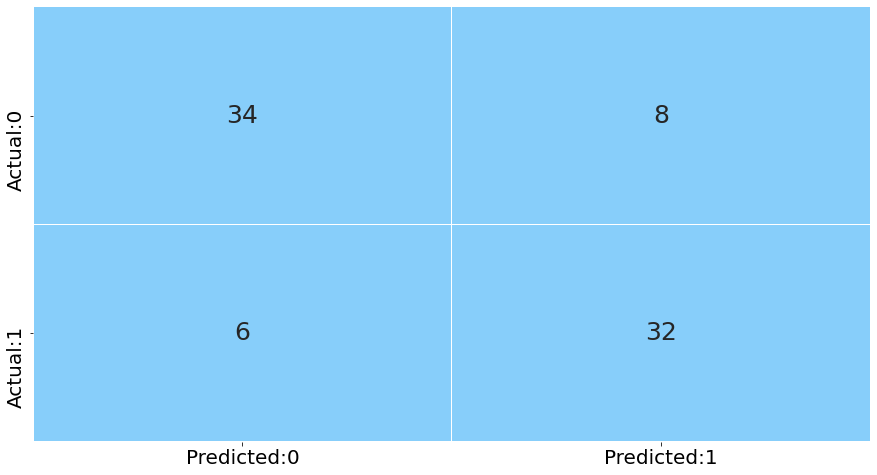

In [130]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

**Calculate performance measures on the test set.**

In [131]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.80      0.84      0.82        38

    accuracy                           0.82        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.83      0.82      0.83        80



**Interpretation:** The above output shows that the f1-score and accuracy of the model is 0.84

#### Plot the ROC curve.

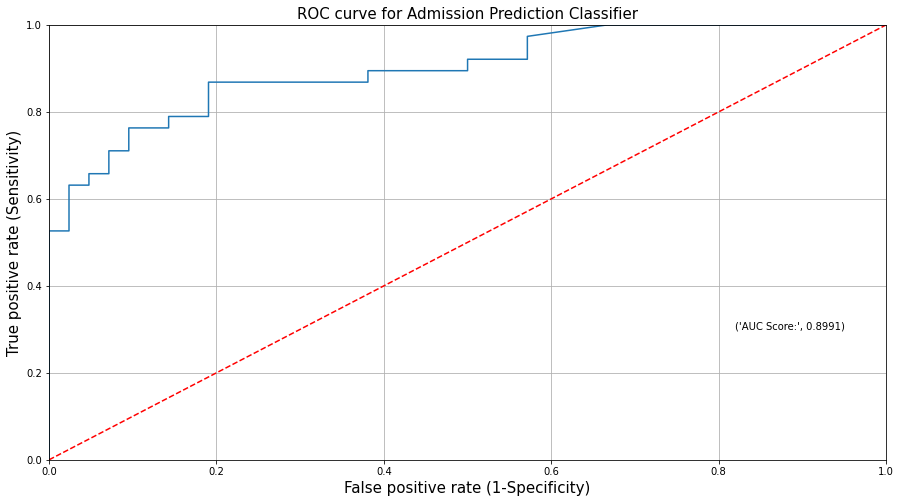

In [132]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the XGBoost model is away from the dotted line; with the AUC score 0.8888.

<a id="tune"></a>
### 3.3.1 Tune the Hyperparameters (GridSearchCV)

Let us tune the hyperparameters to obtain the optimal values for the XGBoost model.

In [87]:
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.3, 'max_depth': 4} 



#### Build the model using the tuned hyperparameters.

In [88]:
# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.80      0.87      0.84        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



**Interpretation:** The above output shows that the f1-score and accuracy of the model is 0.84.

#### Plot the ROC curve.

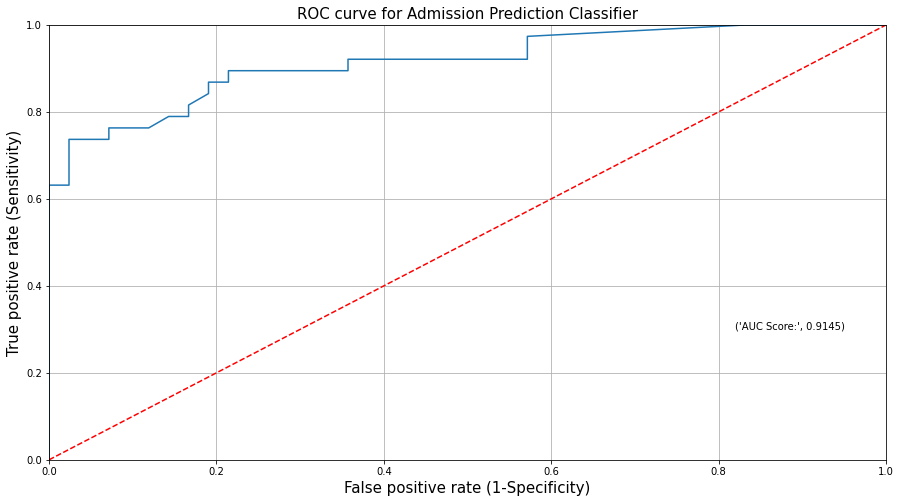

In [89]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the XGBoost model (GridSearchCV) is away from the dotted line; with the AUC score 0.9145.

### Identify the Important Features using XGBoost

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of the average gain across all the splits in which the feature is used to the total average gain of all the features.

There are different methods like `weight`, `cover`, `total_gain` and `total_cover` which returns the feature importance based on different criteria.

`weight`: It is the frequency of a feature used to split the data in all the trees.

`cover`: It is the average cover value of a feature for all the splits.

`total_gain`: It is the sum of gain of a feature for all the splits.

`total_cover`: It is the sum of a cover of a feature for all the splits.

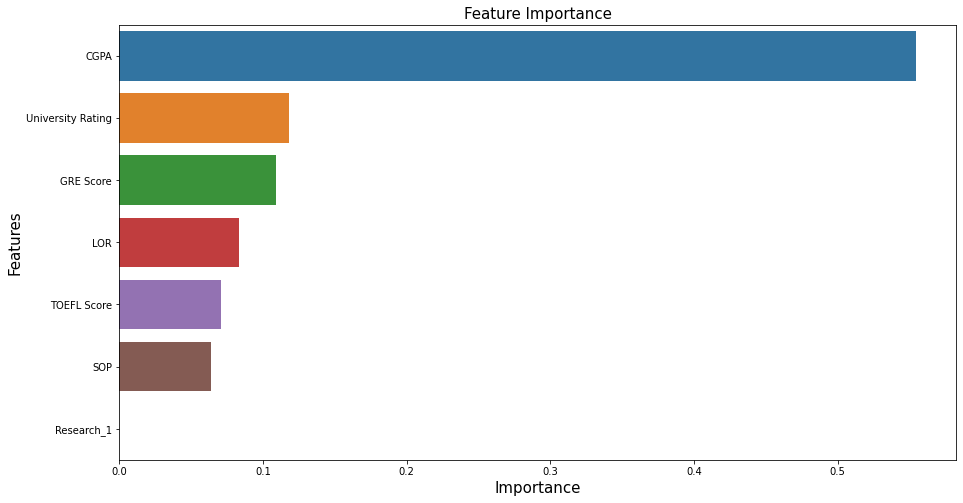

In [90]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above bar plot shows that, the variable `CGPA` is of highest importance. 

<a id="stack"></a>
# 4. Stack Generalization  

Stacking is a machine learning technique that takes several classification or regression models and uses their predictions as the input for the meta-classifier (final classifier) or meta-regressor (final regressor).

As we are using the distance-based algorithm like KNN, we scale the data before applying the stacking technique.

In [91]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

Concatenate scaled numerical and dummy encoded categorical variables.

In [92]:
# concat the dummy variables with scaled numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


Let us split the dataset in train and test set.

In [93]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 7)
y_train (320,)
X_test (80, 7)
y_test (80,)


#### Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners (consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [94]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf_model',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=2,
                                 

#### Plot the confusion matrix.

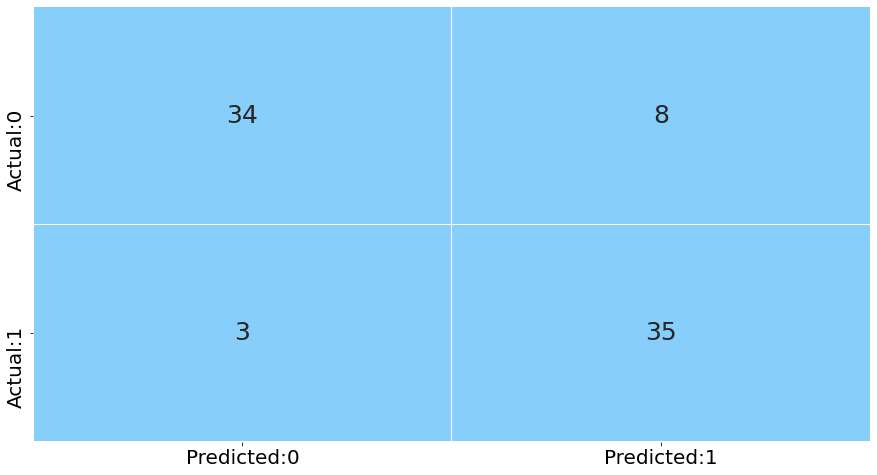

In [95]:
# call the function to plot the confusion matrix
# pass the stack model to the function
plot_confusion_matrix(stack_model)

**Calculate performance measures on the test set.**

In [96]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.81      0.92      0.86        38

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



**Interpretation:** The above output shows that the f1-score and accuracy of the model is 0.86

#### Plot the ROC curve.

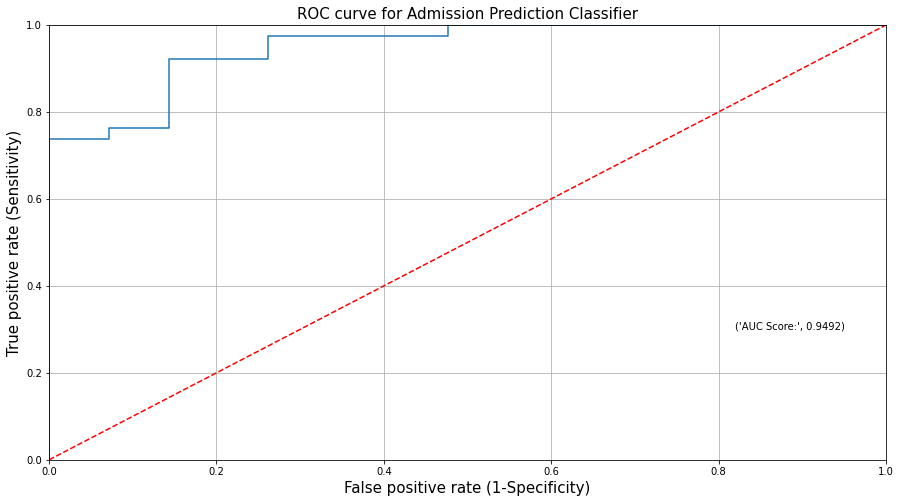

In [97]:
# call the function to plot the ROC curve
# pass the stack model to the function
plot_roc(stack_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9492.